In [ ]:
#Librerias necesarias para carga de archivos, metricas e implementación de modelos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#carga de datos
data = pd.read_csv('Datos_procesados.csv')
#estructura
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   #             2061 non-null   int64
 1   sujeto        2061 non-null   int64
 2   genero        2061 non-null   int64
 3   edad          2061 non-null   int64
 4   edo_civil     2061 non-null   int64
 5   carrera       2061 non-null   int64
 6   semestre      2061 non-null   int64
 7   discapacidad  2061 non-null   int64
 8   lengua        2061 non-null   int64
 9   esc_proc      2061 non-null   int64
 10  prom          2061 non-null   int64
 11  ant_aca       2061 non-null   int64
 12  gusto         2061 non-null   int64
 13  familia       2061 non-null   int64
 14  tipo_f        2061 non-null   int64
 15  vivienda      2061 non-null   int64
 16  desercion     2061 non-null   bool 
dtypes: bool(1), int64(16)
memory usage: 259.8 KB


(   #  sujeto  genero  edad  edo_civil  carrera  semestre  discapacidad  \
 0  1     198       1     0          0        3         0             0   
 1  2     848       0     1          0        2         0             1   
 2  3    1221       1     1          0        8         0             0   
 3  4     198       1     0          0        3         0             0   
 4  5     846       0     1          0        2         0             0   
 
    lengua  esc_proc  prom  ant_aca  gusto  familia  tipo_f  vivienda  \
 0       1        -1    -1     1548      0        0       0         0   
 1       1        -1     1       22      0        0       0         0   
 2       1        -1    -1     1356      0        0       0         0   
 3       1        -1    -1     1548      0        0       0         0   
 4       1        -1    -1       27      0        0       1         0   
 
    desercion  
 0      False  
 1      False  
 2       True  
 3      False  
 4      False  ,
 None)

In [ ]:
## Preparación de los datos para el modelo
#la columna deserción se elimina debido a que es la variable objetivo
X = data.drop(['desercion', '#', 'sujeto'], axis=1)  # Eliminar columnas no relevantes
#se guarda en y según la formúla descrita en el artículo
y= data['desercion']

# División de los datos en conjuntos de entrenamiento y prueba,a un 80-20
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest con el nuevo conjunto de datos
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Realizar predicciones con el nuevo conjunto de prueba
y_pred = random_forest_model.predict(X_test)

# Evaluar el rendimiento del modelo en el nuevo conjunto de datos
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy
print(report)
#Aunque la precisión general es muy alta,
#el recall para la clase de deserción (True) indica que el modelo,
#tiene espacio para mejorar en la identificación de todos los casos positivos reales.
# Esto podría ser un aspecto a considerar para la mejora,
#especialmente en aplicaciones donde identificar todos los casos de deserción es importante.

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       407
        True       1.00      0.67      0.80         6

    accuracy                           1.00       413
   macro avg       1.00      0.83      0.90       413
weighted avg       1.00      1.00      0.99       413



In [ ]:
#popuesta de hiperparámetros, para esto buscamos los mejores hiperparámetros
from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperparámetros a ajustar
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
}

# Crear el modelo de Random Forest para el ajuste
rf_for_tuning = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf_for_tuning, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#  búsqueda de cuadrícula con validación cruzada
grid_search.fit(X_train, y_train)

# Mejores parámetros encontrados
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print( best_score)
#la búsqueda de hiperparámetros encontró que el numero de árboles en el bosque sería de 100
#sin limitar la profundidad del árbol

{'max_depth': None, 'n_estimators': 100}
0.9921138436032052


In [ ]:
# Configurar y entrenar el modelo final utilizando los hiperparámetros encontrados
model_final = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model_final.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_final = model_final.predict(X_test)

# Evaluar el modelo
accuracy_final = accuracy_score(y_test, y_pred_final)
report_final = classification_report(y_test, y_pred_final)

print(f"Accuracy del modelo final: {accuracy_final}")
print("Reporte de clasificación del modelo final:")
print(report_final)

Accuracy del modelo final: 0.9951573849878934
Reporte de clasificación del modelo final:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       407
        True       1.00      0.67      0.80         6

    accuracy                           1.00       413
   macro avg       1.00      0.83      0.90       413
weighted avg       1.00      1.00      0.99       413



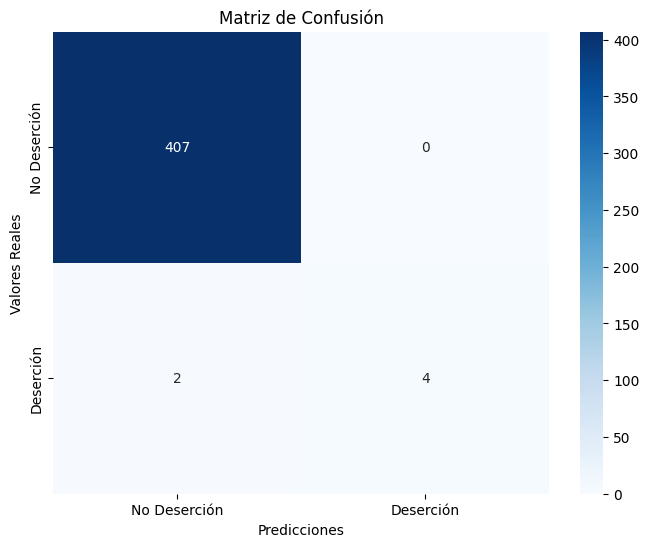

array([[407,   0],
       [  2,   4]])

In [ ]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Deserción', 'Deserción'], yticklabels=['No Deserción', 'Deserción'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()
conf_matrix = confusion_matrix(y_test, y_pred_final)
conf_matrix
#La matriz de confusión revela que el modelo es extremadamente efectivo en predecir los casos de no deserción
# con una precisión global buena.
#El recall para la deserción indica que hay espacio para mejorar en identificar todos los casos positivos reales.

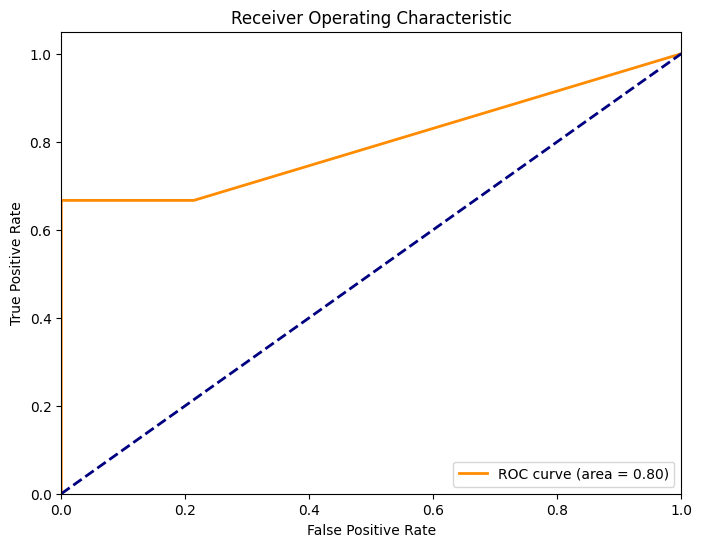

0.7977067977067976


In [ ]:
#tomamos la metrica de espacio ROC
# clase positiva (deserción)
y_probs = model_final.predict_proba(X_test)[:, 1]

# Calcular TPR y FPR para varios umbrales de decisión
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
auc_score = roc_auc_score(y_test, y_probs)
print(auc_score)
#0.7 <= AUC < 0.8: Buen rendimiento. Tu resultado cae en esta categoría,
#lo que indica que el modelo tiene una buena capacidad para diferenciar
# entre estudiantes que desertarán y los que no.